In [2]:
import json
import pandas as pd
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import numpy as np
import re 

master_df = pd.read_csv("C:/Users/mgruz/Desktop/w210/data/nutrient/compiled/nutrition_master_df.csv")

with open('C:/Users/mgruz/Desktop/w210/data/recipe/NDB_NO_tag_dict.json') as f:
    NDB_NO_tag_dict = json.load(f)
    
with open('C:/Users/mgruz/Desktop/w210/data/recipe/recipe_all.json') as f:
    original_recipe = json.load(f)
    
with open('C:/Users/mgruz/Desktop/w210/data/recipe/recipe_clean.json') as f:
    recipe_clean = json.load(f)
    
with open('C:/Users/mgruz/Desktop/w210/data/recipe/recipe_clean_anna.json') as f:
    recipe_clean_anna = json.load(f)
    
with open('C:/Users/mgruz/Desktop/w210/data/recipe/recipe_clean_maura_v1.json') as f:
    recipe_clean_maura_v1 = json.load(f)

height has been deprecated.



In [3]:
for i in NDB_NO_tag_dict.keys():
    
    try:
        if '"' not in NDB_NO_tag_dict[i] and NDB_NO_tag_dict[i] != 'np.nan' and NDB_NO_tag_dict[i] != '':
            print i, NDB_NO_tag_dict[i]
            
            if '"' not in NDB_NO_tag_dict[i]:
                NDB_NO_tag_dict[i] = '"{}"'.format(NDB_NO_tag_dict[i].strip("\t"))
    except:
        print 'FAIL', i

duck fat  04542
ground all spice 02001
sweet dessert wine 14057
canned pumpkin 11424
peppercorns 02030
white bread dough 18014
dried red pepper flakes '02031'
boneless leg of lamb butterflied 17300
hot cherry peppers peppers
blanched whole almonds 12062
shredded red cabbage 11112
2-percent mozzarella cheese 01029
for purging exi
baby bok choy 11116
FAIL pkg martha white chocolate chip muffin mix
reduced-sodium chicken broth 06970
mini rigatoni 20420
dried hot red pepper 02031
raspberry 09302
bunch watercress stems 11591
english muffins 18639
five-spice powder 02031
fresh rosemary 02063
toasted pecans coarsely 12142
small-diced carrots 11124
dark raisins 09299
red radishes 11429


In [4]:
recipe_clean_ALL = {}

for key in recipe_clean.keys():
    recipe_clean_ALL[key] = recipe_clean[key]
    recipe_clean_ALL[key]['NDB_NO_tags'] = []
    
for key in recipe_clean_anna.keys():
    recipe_clean_ALL[key] = recipe_clean_anna[key]
    recipe_clean_ALL[key]['NDB_NO_tags'] = []
    
for key in recipe_clean_maura_v1.keys():
    recipe_clean_ALL[key] = recipe_clean_maura_v1[key]
    recipe_clean_ALL[key]['NDB_NO_tags'] = []

In [5]:
itr = 0

original_text = []
nbd_tag = []
for key in recipe_clean_ALL.keys():
    
    for i in recipe_clean_ALL[key]['ingredients']:
        
        ingredient_split = i.split(" ")
        ingredient_split = filter(None, ingredient_split)
        ingredient_new = " ".join(ingredient_split[2:])
        
        try:
            recipe_clean_ALL[key]['NDB_NO_tags'].append(NDB_NO_tag_dict[ingredient_new])
        except:
            recipe_clean_ALL[key]['NDB_NO_tags'].append('')
    
    
    if len(recipe_clean_ALL[key]['NDB_NO_tags']) == len(original_recipe[key]['ingredients']):       
        itr_2 = 0
        while itr_2 < len(recipe_clean_ALL[key]['NDB_NO_tags']):
            original_text.append(original_recipe[key]['ingredients'][itr_2])
            nbd_tag.append(recipe_clean_ALL[key]['NDB_NO_tags'][itr_2])
            itr_2 += 1
        
        itr += 1

In [274]:
units_of_food_recipe = ["cups", "cup", "c.", "c", 
                        "fl. oz.", "fl oz", "fluid ounce", "fluid ounces",
                        "gal", "gal.", "gallon", "gallons",
                        "oz", "oz.", "ounce", "ounces", "ouncs",
                        "pt", "pt.", "pint", "pints",
                        "lb", "lb.", "pound", "pounds",
                        "qt", "qt.", "qts", "qts.", "quart", "quarts",
                        "tbsp.", "tbsp", "T", "T.", "tablespoon", "tablespoons", "tbs.", "tbs",
                        "tsp.", "tsp", "t", "t.", "teaspoon", "teaspoons",
                        "g", "g.", "gr", "gr.", "gram", "grams", "gramme", "grammes",
                        "kg", "kg.", "kilogram", "kilograms", "kilogramme", "kilogrammes",
                        "l", "l.", "liter", "liters", "litre", "litres",
                        "mg", "mg.", "milligram", "milligrams", "milligramme", "milligrammes",
                        "ml", "ml.", "milliliter", "milliliters", "millilitre", "millilitres",
                        "pinch", "pinches", "dash", "dashes", "touch", "touches", "handful", "handfuls",
                        "stick", "sticks",
                        "cans", "can",
                        "to taste",
                        "scoop", "scoops",
                        "dollop", "dollops",
                        "sprig", "sprigs",
                       "recipe",
                       "garnish", "garnished",
                       "sprinkle", "spinkled",
                       "slices",
                       "serving", "servings",
                       "ribs", "rib", "stalk",
                       "inch", "inches", "in.",
                       "drizzle", "drizzled",
                       "to taste"]

food_size = ["small", "medium",
              "large", "about"]

food_format = ["slice", "sliced",
              "dice", "diced",
              "peel", "peeled",
              "chop", "chopped",
              "julienne", "julienned",
              "trim", "trimmed",
              "sift", "sifted",
              "freshly",
              "fine", "finely",
              "drain", "drained",
              "super thinly", "thin", "thinly",
              "grate", "grated",
              "seeded",
              "rinse", "rinsed",
              "smash", "smashed",
              "membrane", "removed",
              "cleaned",
              "mince", "minced",
              "crush", "crushed",
              "about", "around",
              '<hr>']


def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [354]:
filtered_original_text = []
for original in original_text:
    original = re.sub(r'\s*(\d+|[./+*-])', '', original)
    original_split = original.split(" ")
    remove_list = list(set(original).symmetric_difference(units_of_food_recipe))
    
#     for i in units_of_food_recipe:
#         if i in original_split:
#           original_split.remove(i)

    keep_list = []
    for i in original_split:
        if i not in food_size and i not in units_of_food_recipe:
            keep_list.append(i)
    
#     original_split = filter(None, original_split)
    original_split = filter(None, keep_list)
    new = " ".join(original_split)
    
    
    filtered_original_text.append(new)

In [355]:
nlp_df = pd.DataFrame([original_text, filtered_original_text, nbd_tag]).transpose()
nlp_df.columns = ['original_text', 'filtered_text','NBD_tag']
nlp_df = nlp_df[nlp_df['NBD_tag'] != 'np.nan']
nlp_df['NBD_tag'].replace('', np.nan, inplace=True)
nlp_df.dropna(subset=['NBD_tag'], inplace=True)
nlp_df['filtered_text'] = nlp_df['filtered_text'].str.lower()
nlp_df = nlp_df.drop_duplicates(subset='filtered_text')

In [356]:
from sklearn.model_selection import train_test_split

NBD_tag_unique = nlp_df['NBD_tag'].unique()
NBD_tag_unique_unique_dict = {}

itr = 0
while itr < len(NBD_tag_unique):
    NBD_tag_unique_unique_dict[NBD_tag_unique[itr]] = itr + 1
    itr += 1
    
nn_label_list = []
for i in nlp_df['NBD_tag'].values.tolist():
    nn_label_list.append(NBD_tag_unique_unique_dict[i])
    
    
# only work with the 3000 most popular words found in our dataset
max_words = 3000

# create a new Tokenizer
tokenizer = Tokenizer(num_words=max_words)
# feed our tweets to the Tokenizer
tokenizer.fit_on_texts(nlp_df['filtered_text'].tolist())   


X_train_initial, X_test, y_train_initial, y_test = train_test_split(nlp_df['filtered_text'], nn_label_list, train_size=0.7)
X_train, X_dev, y_train, y_dev = train_test_split(nlp_df['filtered_text'], nn_label_list, train_size=0.8)

In [357]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
import keras.preprocessing.text as kpt
import keras

dictionary = tokenizer.word_index
# Let's save this out so we can use it later
with open('dictionary.json', 'w') as dictionary_file:
    json.dump(dictionary, dictionary_file)
    
def convert_text_to_index_array(text):
    # one really important thing that `text_to_word_sequence` does
    # is make all texts the same length -- in this case, the length
    # of the longest text in the set.
    
    word_list = []
    
    for word in kpt.text_to_word_sequence(text):
        try:
            word_list.append(dictionary[word])
            
        except:
            print("Word:", word, " not in index...SKIP")
    
#     return [dictionary[word] for word in kpt.text_to_word_sequence(text)]
    return word_list

allWordIndices = []
# for each tweet, change each token to its ID in the Tokenizer's word_index
for text in X_train.tolist():
    wordIndices = convert_text_to_index_array(text)    
    allWordIndices.append(wordIndices)

# now we have a list of all tweets converted to index arrays.
# cast as an array for future usage.
allWordIndices = np.asarray(allWordIndices)

# create one-hot matrices out of the indexed tweets
train_x = tokenizer.sequences_to_matrix(allWordIndices, mode='binary')

train_y = keras.utils.to_categorical(np.asarray(y_train))

In [358]:
allWordIndicesTEST = []
# for each tweet, change each token to its ID in the Tokenizer's word_index
for text in X_test.tolist():
    wordIndicesTEST = convert_text_to_index_array(text)    
    allWordIndicesTEST.append(wordIndicesTEST)

# now we have a list of all tweets converted to index arrays.
# cast as an array for future usage.
allWordIndicesTEST = np.asarray(allWordIndicesTEST)

# create one-hot matrices out of the indexed tweets
test_x = tokenizer.sequences_to_matrix(allWordIndicesTEST, mode='binary')
test_y = keras.utils.to_categorical(np.asarray(y_test))

if train_y.shape[1] != test_y.shape[1]:
    new_test_y_list = []
    additional_zero = train_y.shape[1] - test_y.shape[1]
    for i in range(test_y.shape[0]):
        new_test_y_list.append(test_y[i].tolist() + [0]*additional_zero)
    
    new_test_y_array = np.asarray(new_test_y_list)
    test_y = new_test_y_array.reshape(test_y.shape[0], train_y.shape[1])
    

    
allWordIndicesDEV = []
# for each tweet, change each token to its ID in the Tokenizer's word_index
for text in X_dev.tolist():
    wordIndicesDEV = convert_text_to_index_array(text)    
    allWordIndicesDEV.append(wordIndicesDEV)

# now we have a list of all tweets converted to index arrays.
# cast as an array for future usage.
allWordIndicesDEV = np.asarray(allWordIndicesDEV)

# create one-hot matrices out of the indexed tweets
dev_x = tokenizer.sequences_to_matrix(allWordIndicesDEV, mode='binary')
dev_y = keras.utils.to_categorical(np.asarray(y_dev))


if train_y.shape[1] != dev_y.shape[1]:
    new_dev_y_list = []
    additional_zero = train_y.shape[1] - dev_y.shape[1]
    for i in range(dev_y.shape[0]):
        new_dev_y_list.append(dev_y[i].tolist() + [0]*additional_zero)
    
    new_dev_y_array = np.asarray(new_dev_y_list)
    dev_y = new_dev_y_array.reshape(dev_y.shape[0], train_y.shape[1])

In [359]:
print train_y.shape
print test_y.shape
print dev_y.shape

(2285L, 658L)
(858L, 658L)
(572L, 658L)


In [370]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# loading
# with open('tokenizer.pickle', 'rb') as handle:
#     tokenizer = pickle.load(handle)

In [360]:
output_classification =  train_y.shape[-1]

In [361]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

model = Sequential()
model.add(Dense(512, input_shape=(max_words,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(output_classification, activation='softmax'))

In [362]:
model.compile(loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

In [363]:
history = model.fit(train_x, train_y,
  batch_size=32,
  epochs=50,
  verbose=1,
  validation_split=0.1,
  shuffle=True,
  validation_data=(dev_x, dev_y))

Train on 2285 samples, validate on 572 samples
Epoch 1/50


C:\Users\mgruz\Anaconda2\lib\site-packages\cntk\core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input9271") expects "<type 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


2285/2285 [==============================] - 5s 2ms/step - loss: 6.1993 - acc: 0.0241 - val_loss: 5.9969 - val_acc: 0.0507


C:\Users\mgruz\Anaconda2\lib\site-packages\cntk\core.py:361: UserWarning: your data is of type "float64", but your input variable (uid "Input9342") expects "<type 'numpy.float32'>". Please convert your data beforehand to speed up training.
  (sample.dtype, var.uid, str(var.dtype)))


Epoch 2/50
2285/2285 [==============================] - 5s 2ms/step - loss: 5.7035 - acc: 0.0538 - val_loss: 5.7406 - val_acc: 0.0874
Epoch 3/50
2285/2285 [==============================] - 5s 2ms/step - loss: 5.3839 - acc: 0.0823 - val_loss: 5.5172 - val_acc: 0.1154
Epoch 4/50
2285/2285 [==============================] - 5s 2ms/step - loss: 5.0676 - acc: 0.1282 - val_loss: 5.2885 - val_acc: 0.1818
Epoch 5/50
2285/2285 [==============================] - 5s 2ms/step - loss: 4.7554 - acc: 0.1921 - val_loss: 5.1052 - val_acc: 0.2378
Epoch 6/50
2285/2285 [==============================] - 5s 2ms/step - loss: 4.4459 - acc: 0.2442 - val_loss: 4.8832 - val_acc: 0.2762
Epoch 7/50
2285/2285 [==============================] - 5s 2ms/step - loss: 4.1490 - acc: 0.2941 - val_loss: 4.6901 - val_acc: 0.3059
Epoch 8/50
2285/2285 [==============================] - 5s 2ms/step - loss: 3.8499 - acc: 0.3387 - val_loss: 4.5124 - val_acc: 0.3671
Epoch 9/50
2285/2285 [==============================] - 5s 2ms

In [364]:
model_json = model.to_json()
with open('model_simple_nn.json', 'w') as json_file:
    json_file.write(model_json)

model.save_weights('model_simple_nn_WEIGHTS.h5')

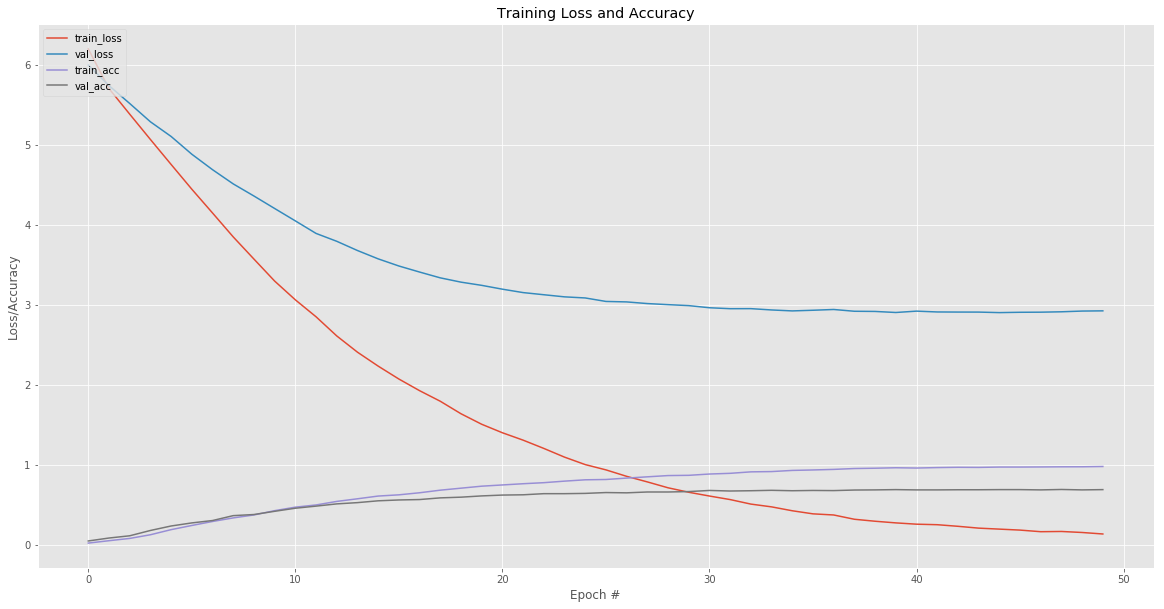

In [365]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the training loss and accuracy
plt.style.use("ggplot")
plt.figure(figsize=(20, 10))
N = 50
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper left")

In [366]:
phrase = "egg white"
tokens = tokenizer.texts_to_matrix([phrase])
n = 3
prediction = model.predict(np.array(tokens))

index_top_3_list =  model.predict(np.array(tokens)).argsort()[0][-n:][::-1]
NBD_top_3_list = []
percentage_top_3_list = []
for i in index_top_3_list:   
    for key in NBD_tag_unique_unique_dict.keys():        
        if NBD_tag_unique_unique_dict[key] == i:
            NBD_top_3_list.append(key)
            percentage_top_3_list.append(prediction[0][i])

itr = 0
while itr < len(NBD_top_3_list):
    print master_df[master_df['NDB_NO'] == "\"{}\"".format(NBD_top_3_list[itr].strip('"'))]['Description'].get_values()[0], percentage_top_3_list[itr]
    itr += 1

egg, whole, raw, fresh 0.9887726
egg, yolk, raw, fresh 0.0049415356
egg, whole, cooked, hard-boiled 0.0009355409


In [367]:
y_predict_array = model.predict(test_x)
y_predict_int_list = []
itr = 0
while itr < len(y_predict_array):
    y_predict_int_list.append(y_predict_array[itr].argmax())
    itr += 1
    
y_predict_list = []
for i in y_predict_int_list:
    for key in NBD_tag_unique_unique_dict.keys():
        if NBD_tag_unique_unique_dict[key] == i:
            y_predict_list.append(key)
            
test_y_raw_list = []
for i in y_test:   
    for key in NBD_tag_unique_unique_dict.keys():        
        if NBD_tag_unique_unique_dict[key] == i:
            test_y_raw_list.append(key)

output_df = pd.DataFrame([y_predict_list, test_y_raw_list]).transpose()
output_df.columns = ["y_predict_list", "y_test"]
output_df['Description_predict'] = ''
output_df['Description_test'] = ''

output_df

# itr = 0
# while itr < len(output_df):
        
#     try:
#         output_df.loc[itr, 'Description_predict'] = master_df[master_df['NDB_NO'] == "\"{}\"".format(output_df.loc[itr, 'y_predict_list'].strip('"'))]['Description'].get_values()[0]
#         output_df.loc[itr, 'Description_test'] = master_df[master_df['NDB_NO'] == "\"{}\"".format(output_df.loc[itr, 'y_test'].strip('"'))]['Description'].get_values()[0]

#     except:
        
#         print itr,"FAILED"
        
#     itr += 1
        
        
# output_df

,y_predict_list,y_test,Description_predict,Description_test
0,"""09019""","""09019""",,
1,"""02047""","""02047""",,
2,"""02045""","""02045""",,
3,"""09291""","""09291""",,
4,"""12117""","""12117""",,
5,"""19120""","""19120""",,
6,"""06172""","""06172""",,
7,"""15261""","""15261""",,
8,"""19335""","""19335""",,
9,"""01056""","""01056""",,


In [368]:
(output_df['y_predict_list'] == output_df['y_test']).mean()

0.9358974358974359